In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True
import seaborn as sns
import os

In [219]:
mouse_df = pd.read_csv("raw_data/mouse_drug_data.csv")
clinic_df = pd.read_csv("raw_data/clinicaltrial_data.csv")


In [220]:
#mouse_df.head()
#clinic_df.head()

In [221]:
merge_df=pd.merge(clinic_df,mouse_df,how='left',on="Mouse ID")
#merge_df.head()
merge_df.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug'],
      dtype='object')

In [222]:
tumor_vol=merge_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()

In [223]:
tumor_vol_1=tumor_vol.unstack()

In [224]:
tumor_vol_2=tumor_vol_1.transpose()
tumor_vol_2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [225]:
#fahrenheit, = plt.plot(x_axis, points_F, marker="+",color="blue", linewidth=1, label="Fahreneit")
#celcius, = plt.plot(x_axis, points_C, marker="s", color="Red", linewidth=1, label="Celcius")
#Capomulin,Infubinol,Placebo,Ketapril
tumor_vol_final=tumor_vol_2[['Capomulin','Infubinol','Placebo','Ketapril']]
tumor_vol_final_1=tumor_vol_final.reset_index()
tumor_vol_final_1.columns

Index(['Timepoint', 'Capomulin', 'Infubinol', 'Placebo', 'Ketapril'], dtype='object', name='Drug')

Text(0.5,1,'Tumor volume changes over time for each treatment')

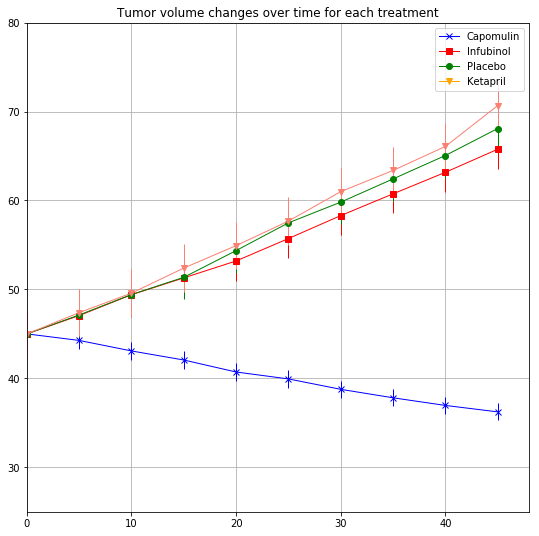

In [236]:
#Capomulin, = plt.errorbar(tumor_vol_final_1['Timepoint'], tumor_vol_final_1['Capomulin'],yerr=tumor_vol_final_1['Capomulin'].sem(), marker="+",color="blue", linewidth=1, label="Capomulin")
plt.figure(figsize=(9,9))

plt.errorbar(tumor_vol_final_1['Timepoint'], tumor_vol_final_1['Capomulin'],yerr=tumor_vol_final_1['Capomulin'].sem(), marker="x",color="blue", linewidth=1, label="Capomulin")
plt.errorbar(tumor_vol_final_1['Timepoint'], tumor_vol_final_1['Infubinol'],yerr=tumor_vol_final_1['Infubinol'].sem(), marker="s",color="red", linewidth=1, label="Infubinol")
plt.errorbar(tumor_vol_final_1['Timepoint'], tumor_vol_final_1['Placebo'],yerr=tumor_vol_final_1['Placebo'].sem(),marker="o",color="green", linewidth=1, label="Placebo")
plt.errorbar(tumor_vol_final_1['Timepoint'], tumor_vol_final_1['Ketapril'],yerr=tumor_vol_final_1['Ketapril'].sem(), marker="v",color="salmon", linewidth=1, label="Ketapril")
plt.legend(handles=[Capomulin,Infubinol,Placebo,Ketapril], loc="best")
plt.grid()
plt.xlim(0,48)
plt.ylim(25,80)

plt.title("Tumor volume changes over time for each treatment")


In [87]:
tumor_met=merge_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
#tumor_met

In [88]:
tumor_met_1=tumor_met.unstack()


In [90]:
tumor_met_2=tumor_met_1.transpose()


In [91]:
tumor_met_final=tumor_met_2[['Capomulin','Infubinol','Placebo','Ketapril']]
tumor_met_final_1=tumor_met_final.reset_index()
tumor_met_final_1.head()

Drug,Timepoint,Capomulin,Infubinol,Placebo,Ketapril
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.375000,0.304348
2,10,0.320000,0.666667,0.833333,0.590909
3,15,0.375000,0.904762,1.250000,0.842105
4,20,0.652174,1.050000,1.526316,1.210526


Text(0.5,1,'No of metastatic sites changes over time')

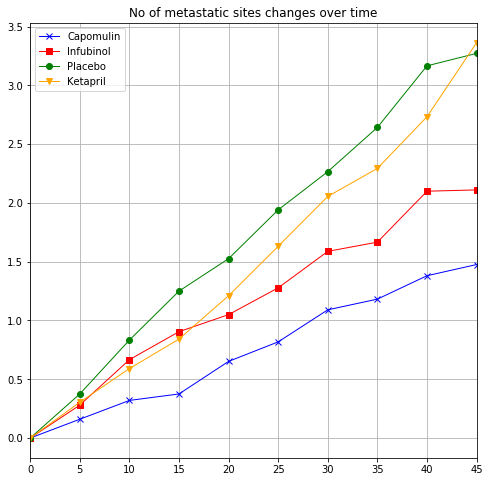

In [235]:
plt.figure(figsize=(8,8))
Capomulin, = plt.plot(tumor_met_final_1['Timepoint'], tumor_met_final_1['Capomulin'], marker="x",color="blue", linewidth=1, label="Capomulin")
Infubinol, = plt.plot(tumor_met_final_1['Timepoint'], tumor_met_final_1['Infubinol'], marker="s",color="red", linewidth=1, label="Infubinol")
Placebo, = plt.plot(tumor_met_final_1['Timepoint'], tumor_met_final_1['Placebo'], marker="o",color="green", linewidth=1, label="Placebo")
Ketapril, = plt.plot(tumor_met_final_1['Timepoint'], tumor_met_final_1['Ketapril'], marker="v",color="orange", linewidth=1, label="Ketapril")

#plt.figure(figsize=(8,8))
plt.legend(handles=[Capomulin,Infubinol,Placebo,Ketapril], loc="best")
plt.grid()
plt.xlim(0,45)
plt.title("No of metastatic sites changes over time")



In [95]:
tumor_survival=merge_df.groupby(['Drug','Timepoint'])['Mouse ID'].count()


In [96]:
tumor_survival_1=tumor_survival.unstack()

In [98]:
tumor_survival_2=tumor_survival_1.transpose()
tumor_survival_2

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [99]:
tumor_survival_final=tumor_survival_2[['Capomulin','Infubinol','Placebo','Ketapril']]
tumor_survival_final_1=tumor_survival_final.reset_index()
tumor_survival_final_1.head()

Drug,Timepoint,Capomulin,Infubinol,Placebo,Ketapril
0,0,25,25,25,25
1,5,25,25,24,23
2,10,25,21,24,22
3,15,24,21,20,19
4,20,23,20,19,19


(0, 45)

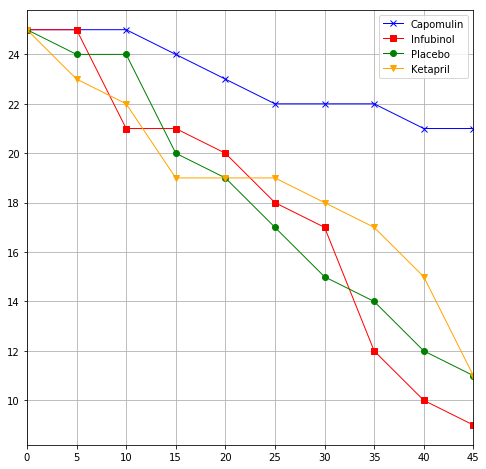

In [234]:
plt.figure(figsize=(8,8))
Capomulin, = plt.plot(tumor_survival_final_1['Timepoint'], tumor_survival_final_1['Capomulin'], marker="x",color="blue", linewidth=1, label="Capomulin")
Infubinol, = plt.plot(tumor_survival_final_1['Timepoint'], tumor_survival_final_1['Infubinol'], marker="s",color="red", linewidth=1, label="Infubinol")
Placebo, = plt.plot(tumor_survival_final_1['Timepoint'], tumor_survival_final_1['Placebo'], marker="o",color="green", linewidth=1, label="Placebo")
Ketapril, = plt.plot(tumor_survival_final_1['Timepoint'], tumor_survival_final_1['Ketapril'], marker="v",color="orange", linewidth=1, label="Ketapril")

plt.legend(handles=[Capomulin,Infubinol,Placebo,Ketapril], loc="best")
plt.grid()
plt.xlim(0,45)

In [371]:
#tumor_change_1=tumor_vol_2.iloc[0]
tumor_change_index=tumor_vol_2

#tumor_change_index.set_index
tumor_change=(tumor_change_index.iloc[9]-tumor_change_index.iloc[0])*100/tumor_change_index.iloc[0]

In [372]:
tumor_change=tumor_change.round(1)
tumor_change

Drug
Capomulin   -19.5
Ceftamin     42.5
Infubinol    46.1
Ketapril     57.0
Naftisol     53.9
Placebo      51.3
Propriva     47.2
Ramicane    -22.3
Stelasyn     52.1
Zoniferol    46.6
dtype: float64

In [383]:
tumor_change=tumor_change[['Capomulin','Infubinol','Placebo','Ketapril']]
#tumor_change=pd.DataFrame([tumor_change])
#tumor_change = tumor_change.map("{0:,.2f}%".format)

tumor_change

Drug
Capomulin   -19.5
Infubinol    46.1
Placebo      51.3
Ketapril     57.0
dtype: float64

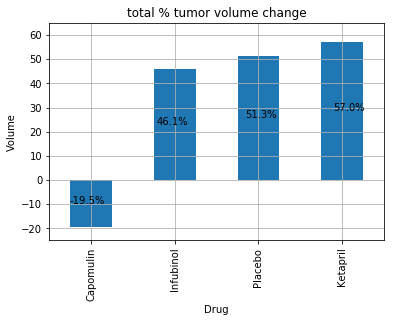

In [390]:

tumor_chart = tumor_change.plot(kind="bar", title="total % tumor volume change")
#tumor_change.set_xlabel("Drug")
tumor_chart.set_ylabel("Volume")
# = tumor_change.map("{0:,.2f}%".format)

plt.grid()
plt.ylim(-25,65)
for p in tumor_chart.patches:
    tumor_chart.annotate(str(p.get_height())+"%", (p.get_x()*1.05 , p.get_height()*.5))


plt.show()


